In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from kalman import Kalman_Filter
from llm_AR1 import CSIR_particle_filters, ar1_generator
from pykalman import KalmanFilter

In [2]:
mu = 0.5
phi = 0.975
x_sigma_square = 0.02
y_sigma_square = 2
N1 = 300
N2 = 3500
T = 5000
observations_5000 = ar1_generator(T, mu, phi, x_sigma_square, y_sigma_square, seed = 1)


In [3]:
# A, b = phi, (1 - phi) * mu
# C, d = 1, 0
# Q = x_sigma_square
# R = y_sigma_square

# kf = KalmanFilter(transition_matrices = A, observation_matrices = C, transition_covariance = Q, observation_covariance = R, transition_offsets = b, observation_offsets = d,
#              initial_state_mean = 0, initial_state_covariance = x_sigma_square, random_state = 123)

# log_lkh_kalman = kf.loglikelihood(np.reshape(observations_5000, (T, 1)))
# print(log_lkh_kalman)

A, b = phi, (1 - phi) * mu
_, ct = Kalman_Filter.compute_log_likelihood(
    Y = observations_5000,
    mu0 = 0, ## (1 - phi) * mu
    V0 = x_sigma_square / (1 - phi ** 2),
    A = A,
    b = b,
    V = x_sigma_square,
    V_epi = y_sigma_square
)
log_lkh_kalman = np.log(ct)

In [4]:
np.random.seed(2)
particles_300 = np.random.randn(N1) * np.sqrt(x_sigma_square / (1 - phi ** 2))
CSIR_likelihood = CSIR_particle_filters(
    observations = observations_5000,
    particles = particles_300,
    mu = mu,
    phi = phi,
    x_sigma_square = x_sigma_square,
    y_sigma_square = y_sigma_square,
    transition_seed = 123,
    stratified_seed = 345
)
log_CSIR_likelihood_300 = np.log(CSIR_likelihood)


particles_3500 = np.random.randn(N2) * np.sqrt(x_sigma_square / (1 - phi ** 2))
CSIR_likelihood = CSIR_particle_filters(
    observations = observations_5000,
    particles = particles_3500,
    mu = mu,
    phi = phi,
    x_sigma_square = x_sigma_square,
    y_sigma_square = y_sigma_square,
    transition_seed = 123,
    stratified_seed = 345
)
log_CSIR_likelihood_3500 = np.log(CSIR_likelihood)

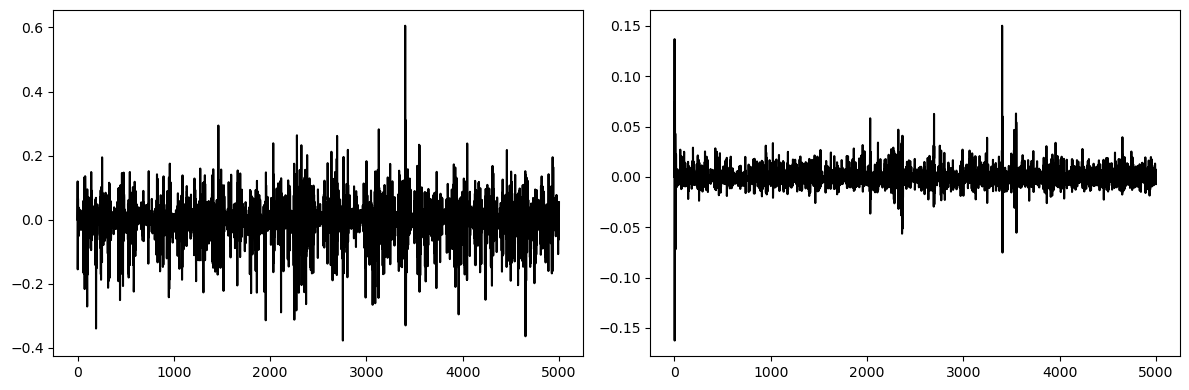

In [5]:
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.plot((log_CSIR_likelihood_300 - log_lkh_kalman), c = 'black')
plt.subplot(122)
plt.plot((log_CSIR_likelihood_3500 - log_lkh_kalman), c = 'black')
plt.tight_layout()
plt.show()

In [10]:
mus = np.linspace(0.32, 0.65, 12)
log_likelihoods_kalman_mu = []
log_likelihoods_mu = [[], [], []]
N1 = 300
N2 = 3500
N3 = 5000
replications = 10
for mu in mus:
    A = phi
    b = (1 - phi) * mu
    log_lkh_kalman, ct = Kalman_Filter.compute_log_likelihood(Y = observations_5000,
                                    mu0 = 0,
                                    V0 = x_sigma_square / (1 - phi ** 2), 
                                    A = A, 
                                    b = b, 
                                    V = x_sigma_square,
                                    V_epi = y_sigma_square)
    log_likelihoods_kalman_mu.append(log_lkh_kalman)
    ll = []
    for  N in [N1, N2, N3]:
        np.random.seed(2)
        particles_N = np.random.randn(N) * np.sqrt(x_sigma_square / (1 - phi ** 2))
        ll_rep = []
        for rep in range(replications):
            CSIR_likelihood_N = CSIR_particle_filters(
                observations = observations_5000,
                particles = particles_N,
                mu = mu,
                phi = phi,
                x_sigma_square = x_sigma_square,
                y_sigma_square = y_sigma_square,
                transition_seed = rep * 10,
                stratified_seed = rep 
            )
            ll_rep.append(np.sum(np.log(CSIR_likelihood_N)))
        ll.append(np.mean(ll_rep))
    for i in range(3):
        log_likelihoods_mu[i].append(ll[i])
    

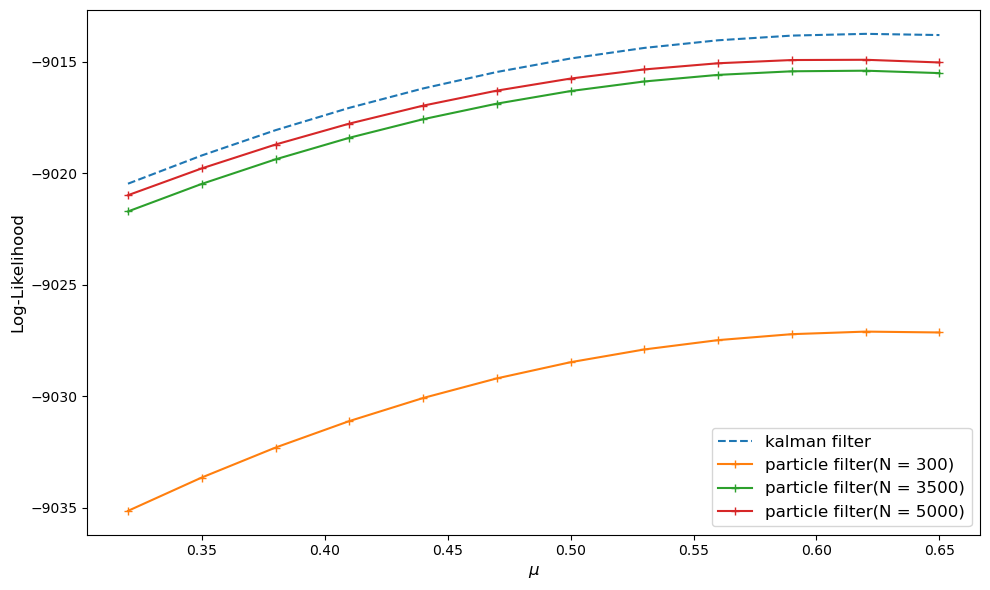

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(mus, np.array(log_likelihoods_kalman_mu), '--',label='kalman filter')
plt.plot(mus, np.array(log_likelihoods_mu[0]), '+-',label='particle filter(N = 300)')
plt.plot(mus, np.array(log_likelihoods_mu[1]), '+-',label='particle filter(N = 3500)')
plt.plot(mus, np.array(log_likelihoods_mu[2]), '+-',label='particle filter(N = 5000)')
plt.xlabel(r'$\mu$', fontsize=12)
plt.ylabel('Log-Likelihood', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
#plt.savefig("AR1_kalman_csir.jpg", dpi = 1000)
plt.show()

In [20]:
mus = np.linspace(0.32, 0.65, 12)
log_likelihoods_kalman_mu = []
log_likelihoods_mu = [[], [], [], [], [], []]
N1 = 300
N2 = 3500
N3 = 5000
N4 = 10000
N5 = 50000
N6 = 100000
replications = 6
for mu in mus:
    A = phi
    b = (1 - phi) * mu
    log_lkh_kalman, ct = Kalman_Filter.compute_log_likelihood(Y = observations_5000,
                                    mu0 = 0,
                                    V0 = x_sigma_square / (1 - phi ** 2), 
                                    A = A, 
                                    b = b, 
                                    V = x_sigma_square,
                                    V_epi = y_sigma_square)
    log_likelihoods_kalman_mu.append(log_lkh_kalman)
    ll = []
    for  N in [N1, N2, N3, N4, N5, N6]:
        np.random.seed(2)
        particles_N = np.random.randn(N) * np.sqrt(x_sigma_square / (1 - phi ** 2))
        ll_rep = []
        for rep in range(replications):
            CSIR_likelihood_N = CSIR_particle_filters(
                observations = observations_5000,
                particles = particles_N,
                mu = mu,
                phi = phi,
                x_sigma_square = x_sigma_square,
                y_sigma_square = y_sigma_square,
                transition_seed = rep,
                stratified_seed = rep 
            )
            ll_rep.append(np.sum(np.log(CSIR_likelihood_N)))
        ll.append(np.mean(ll_rep))
    for i in range(6):
        log_likelihoods_mu[i].append(ll[i])
    

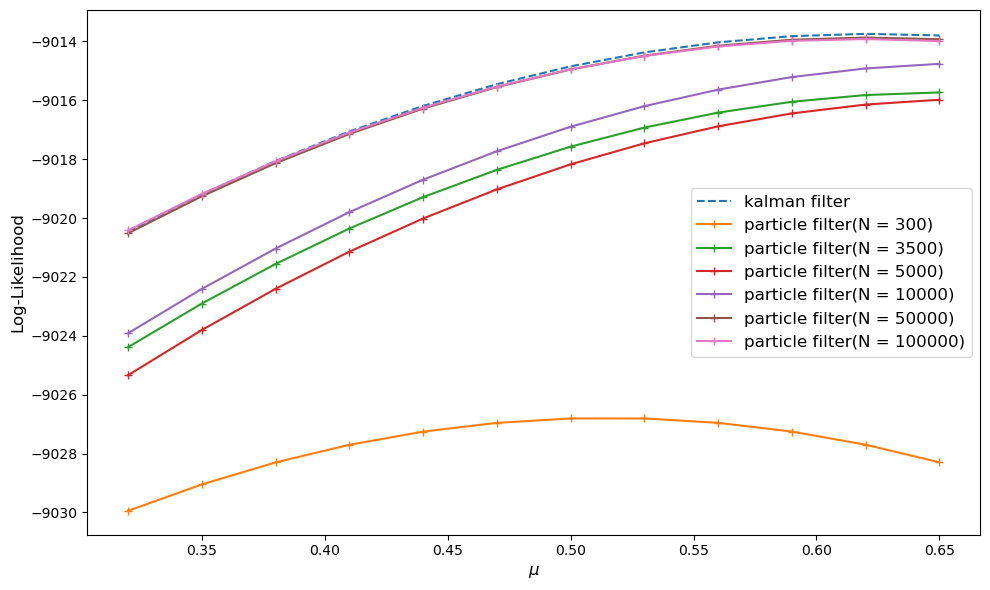

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(mus, np.array(log_likelihoods_kalman_mu), '--',label='kalman filter')
plt.plot(mus, np.array(log_likelihoods_mu[0]), '+-',label='particle filter(N = 300)')
plt.plot(mus, np.array(log_likelihoods_mu[1]), '+-',label='particle filter(N = 3500)')
plt.plot(mus, np.array(log_likelihoods_mu[2]), '+-',label='particle filter(N = 5000)')
plt.plot(mus, np.array(log_likelihoods_mu[3]), '+-',label='particle filter(N = 10000)')
plt.plot(mus, np.array(log_likelihoods_mu[4]), '+-',label='particle filter(N = 50000)')
plt.plot(mus, np.array(log_likelihoods_mu[5]), '+-',label='particle filter(N = 100000)')
plt.xlabel(r'$\mu$', fontsize=12)
plt.ylabel('Log-Likelihood', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("AR1_kalman_csir.jpg", dpi = 1000)
plt.show()

In [27]:
ratio = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
mus = np.linspace(0.32, 0.65, 12)
log_likelihoods_kalman_mu = []
log_likelihoods_mu = [[] for i in range(len(ratio))]
for mu in mus:
    A = phi
    b = (1 - phi) * mu
    log_lkh_kalman, ct = Kalman_Filter.compute_log_likelihood(Y = observations_5000,
                                    mu0 = 0,
                                    V0 = x_sigma_square / (1 - phi ** 2), 
                                    A = A, 
                                    b = b, 
                                    V = x_sigma_square,
                                    V_epi = y_sigma_square)
    log_likelihoods_kalman_mu.append(log_lkh_kalman)
    ll = []
    for  r in ratio:
        np.random.seed(2)
        particles_N = np.random.randn(int(T * r)) * np.sqrt(x_sigma_square / (1 - phi ** 2))
 
        CSIR_likelihood_N = CSIR_particle_filters(
            observations = observations_5000,
            particles = particles_N,
            mu = mu,
            phi = phi,
            x_sigma_square = x_sigma_square,
            y_sigma_square = y_sigma_square,
            transition_seed = rep,
            stratified_seed = rep 
        )
        ll.append(np.sum(np.log(CSIR_likelihood_N)))
    for i in range(len(ratio)):
        log_likelihoods_mu[i].append(ll[i])
    

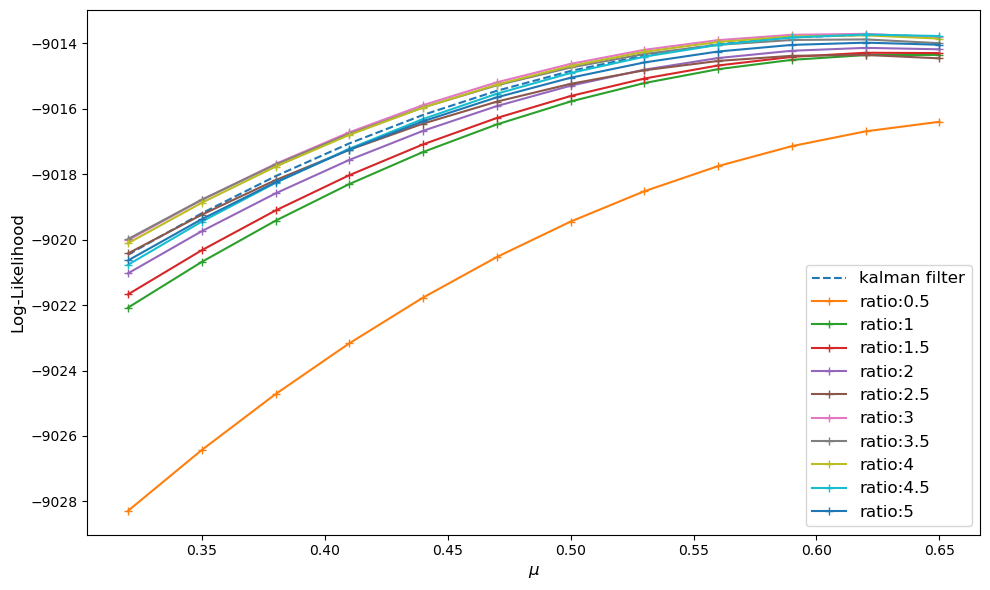

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(mus, np.array(log_likelihoods_kalman_mu), '--',label='kalman filter')
for i in range(len(ratio)):
    plt.plot(mus, np.array(log_likelihoods_mu[i]), '+-',label='ratio:{}'.format(ratio[i]))
plt.xlabel(r'$\mu$', fontsize=12)
plt.ylabel('Log-Likelihood', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("AR1_kalman_csir_ratio.jpg", dpi = 1000)
plt.show()

In [24]:
mu = 0.5
phi = 0.975
x_sigma_square = 0.02
y_sigma_square = 2
N = 1000
T = 20000
observations_20000 = ar1_generator(T, mu, phi, x_sigma_square, y_sigma_square, seed = 1)

In [34]:
sigmas = np.linspace(0.122, 0.158, 12)
log_likelihoods_sigma = [[], []]
np.random.seed(2)
particles_N = np.random.randn(N)
A = phi
b = (1 - phi) * mu
for sigma in sigmas:
    log_lkh_kalman, _ = Kalman_Filter.compute_log_likelihood(Y = observations_20000[1: ],
                                    mu0 = 0,
                                    V0 = (sigma ** 2), 
                                    A = A, 
                                    b = b, 
                                    V = (sigma ** 2),
                                    V_epi = y_sigma_square)
    p0 = norm.pdf(observations_20000[0], loc=0, scale=np.sqrt(y_sigma_square))
    log_lkh_kalman += np.log(p0)
    log_likelihoods_sigma[0].append(log_lkh_kalman)
    
    CSIR_likelihood_N = CSIR_particle_filters(
        observations = observations_20000,
        particles = particles_N,
        mu = mu,
        phi = phi,
        x_sigma_square = (sigma ** 2),
        y_sigma_square = y_sigma_square,
        transition_seed = 123,
        stratified_seed = 345
    )
    log_likelihoods_sigma[1].append(np.sum(np.log(CSIR_likelihood_N)))

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(mus, log_likelihoods_sigma[0], '--',label='kalman filter')
plt.plot(mus, log_likelihoods_sigma[1], '+-',label='particle filter')
plt.xlabel(r'$\sigma$', fontsize=12)
plt.ylabel('Log-Likelihood', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

NameError: name 'log_likelihoods_sigma' is not defined

<Figure size 1000x600 with 0 Axes>